In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/My Drive/Project sem1/Datasets/CO2.csv')

print(df.head())


   ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator               Unit  \
0  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
1  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
2  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
3  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
4  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   

                                              Source CTS_Code  \
0  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
1  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
2  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
3  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
4  Dr. Pieter Tans,

In [ ]:
df = df.drop('ISO2', axis=1)

print(df.head())

   ObjectId Country ISO3                                          Indicator  \
0         1   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
1         2   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
2         3   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
3         4   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
4         5   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   

                Unit                                             Source  \
0  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
1  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
2  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
3  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
4  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   

  CTS_Code                                   CTS_Name  \
0     ECCA  Atmos

In [ ]:
df.dtypes

,0
ObjectId,int64
Country,object
ISO3,object
Indicator,object
Unit,object
Source,object
CTS_Code,object
CTS_Name,object
CTS_Full_Descriptor,object
Date,object


In [ ]:
# Replace 'M' with '-' in the 'Date' column
df['Date'] = df['Date'].str.replace('M', '-')

# Convert to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

print(df.dtypes)
print(df.head())

ObjectId                        int64
Country                        object
ISO3                           object
Indicator                      object
Unit                           object
Source                         object
CTS_Code                       object
CTS_Name                       object
CTS_Full_Descriptor            object
Date                   datetime64[ns]
Value                         float64
dtype: object
   ObjectId Country ISO3                                          Indicator  \
0         1   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
1         2   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
2         3   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
3         4   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
4         5   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   

                Unit                                             Source  \
0  Parts Per Milli

In [ ]:
# Check for missing values
print(df.isnull().sum())

ObjectId               0
Country                0
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS_Code               0
CTS_Name               0
CTS_Full_Descriptor    0
Date                   0
Value                  0
dtype: int64


In [ ]:
# Remove rows where the 'Unit' column contains 'Percent'
df = df[~df['Unit'].str.contains('Percent')]
print(df.head(5))
print(df.tail(5))

   ObjectId Country ISO3                                          Indicator  \
0         1   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
1         2   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
2         3   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
3         4   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
4         5   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   

                Unit                                             Source  \
0  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
1  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
2  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
3  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
4  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   

  CTS_Code                                   CTS_Name  \
0     ECCA  Atmos

In [ ]:
df = df[:-1] # removing last 0.68 1568th row

print(df.tail(5))

      ObjectId Country ISO3  \
1558      1559   World  WLD   
1560      1561   World  WLD   
1562      1563   World  WLD   
1564      1565   World  WLD   
1566      1567   World  WLD   

                                              Indicator               Unit  \
1558  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
1560  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
1562  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
1564  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
1566  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   

                                                 Source CTS_Code  \
1558  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
1560  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
1562  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
1564  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
1566

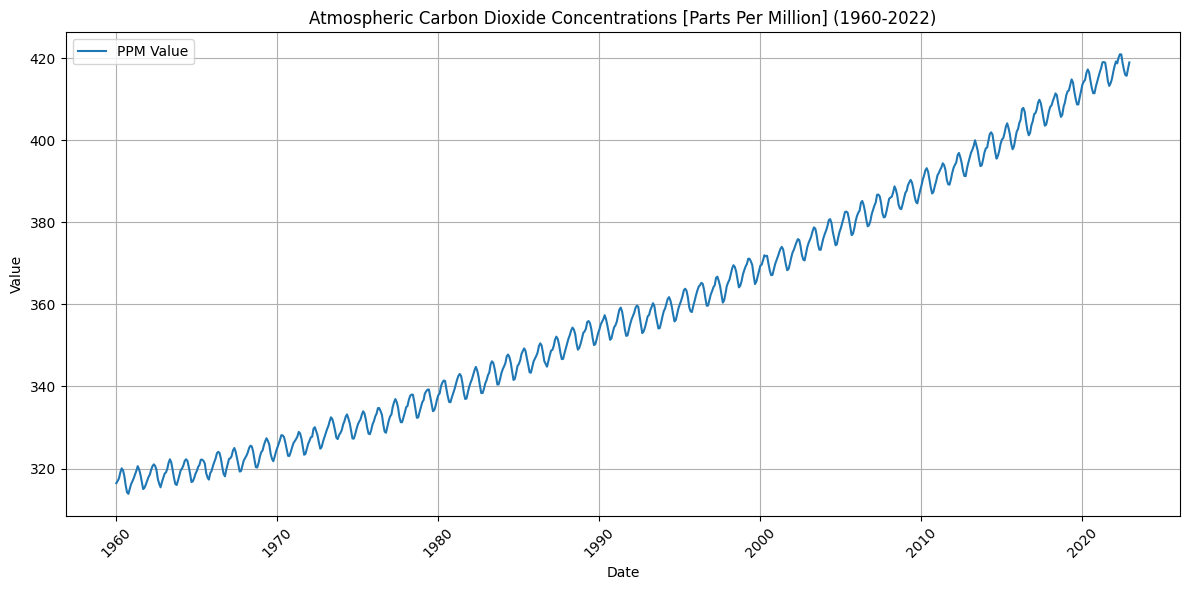

In [ ]:
# Filter data for the specified period
df_filtered = df[(df['Date'] >= '1960-01-01') & (df['Date'] <= '2022-12-31')]
import matplotlib.pyplot as plt
import seaborn as sns
# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value', data=df_filtered, label='PPM Value')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Atmospheric Carbon Dioxide Concentrations [Parts Per Million] (1960-2022)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-10-45ef66755554>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time'] = (df_filtered['Date'] - df_filtered['Date'].min()).dt.days


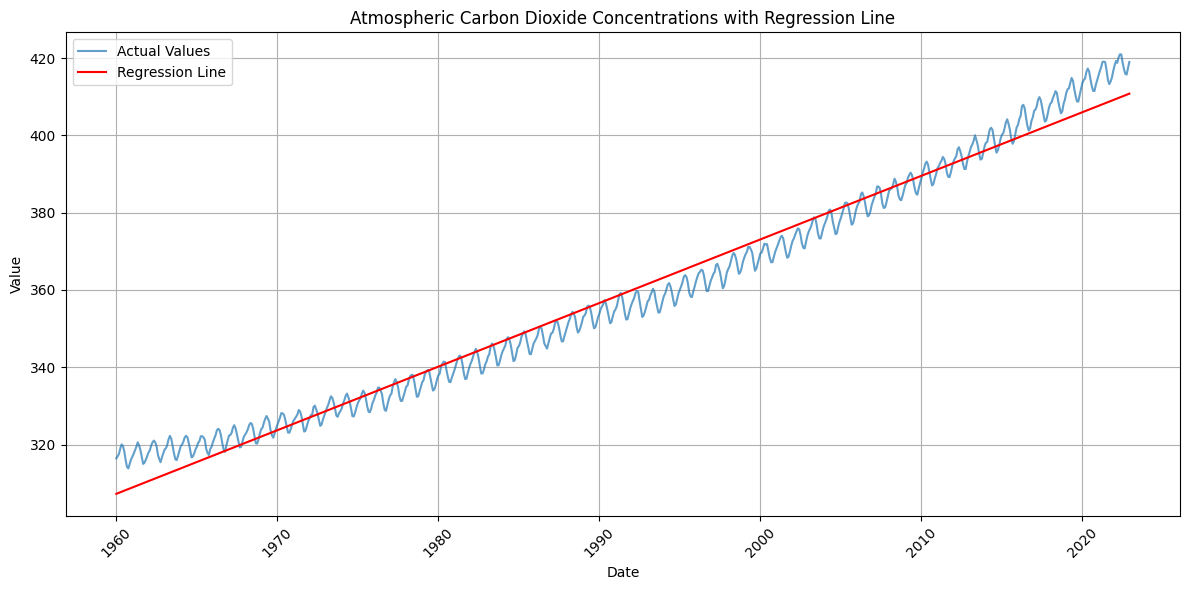

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data for regression
df_filtered['Time'] = (df_filtered['Date'] - df_filtered['Date'].min()).dt.days
X = df_filtered[['Time']]
y = df_filtered['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the regression line along with the original data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value', data=df_filtered, label='Actual Values', alpha=0.7)
plt.plot(df_filtered['Date'], model.predict(X), color='red', label='Regression Line')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Atmospheric Carbon Dioxide Concentrations with Regression Line')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Print the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model (example using R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)*100
print(f"R-squared: {r2} %")

# You can add other evaluation metrics as needed, such as Mean Squared Error (MSE) or Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Coefficients: [0.00450561]
Intercept: 307.2485750703215
R-squared: 97.74697051786634 %
Mean Squared Error: 19.107936506686393
Mean Absolute Error: 3.6588814342312617


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


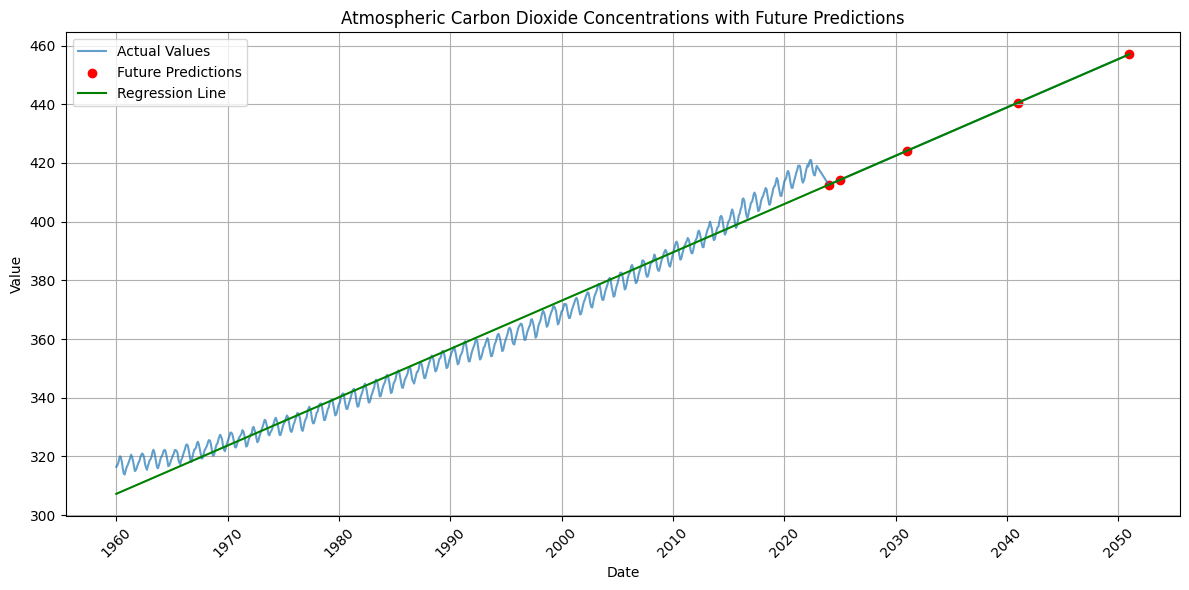

In [ ]:
# Predict values for future years
future_dates = pd.to_datetime(['2023-12-31', '2024-12-31', '2030-12-31','2040-12-31', '2050-12-31'])
# Changed the following line to get days attribute from the TimedeltaIndex
future_time = (future_dates - df_filtered['Date'].min()).days
future_predictions = model.predict(future_time.values.reshape(-1, 1))

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Value': future_predictions})

# Concatenate the original data and future predictions
combined_df = pd.concat([df_filtered, future_df], ignore_index=True)

# Plot the combined data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value', data=combined_df, label='Actual Values', alpha=0.7)

# Highlight the future predictions
plt.scatter(future_df['Date'], future_df['Value'], color='red', label='Future Predictions')

# Note: Ensure 'Time' column is available in combined_df, or adjust accordingly
plt.plot(combined_df['Date'], model.predict((combined_df['Date'] - combined_df['Date'].min()).dt.days.values.reshape(-1,1)), color='green', label='Regression Line')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Atmospheric Carbon Dioxide Concentrations with Future Predictions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Predict values for future years
future_dates = pd.to_datetime(['2023-12-31', '2024-12-31', '2030-12-31','2040-12-31', '2050-12-31'])
future_time = (future_dates - df_filtered['Date'].min()).days
future_predictions = model.predict(future_time.values.reshape(-1, 1))

print("Future Predictions:")
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date}, Predicted Value: {prediction}")

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Value': future_predictions})


Future Predictions:
Date: 2023-12-31 00:00:00, Predicted Value: 412.5672139719967
Date: 2024-12-31 00:00:00, Predicted Value: 414.2162673126603
Date: 2030-12-31 00:00:00, Predicted Value: 424.08805930554036
Date: 2040-12-31 00:00:00, Predicted Value: 440.5470534406342
Date: 2050-12-31 00:00:00, Predicted Value: 457.0015419655077


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


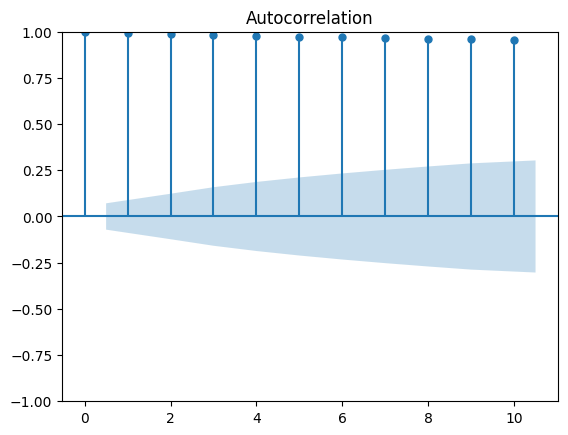

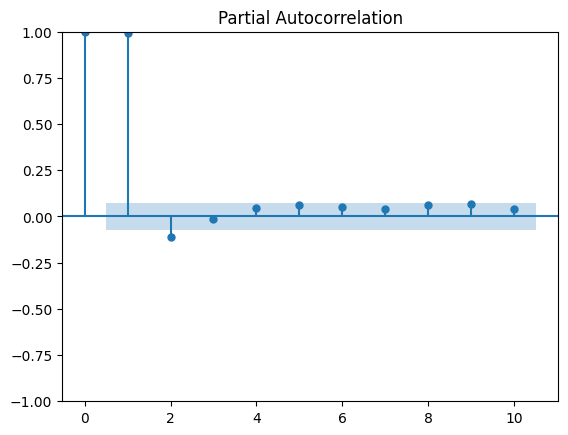

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF
plot_acf(df_filtered['Value'], lags=10)  # Adjust lags as needed
plt.show()

plot_pacf(df_filtered['Value'], lags=10)  # Adjust lags as needed
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_filtered['Value'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
p_value = result[1]
if p_value <= 0.05:
    print("The series is stationary (reject the null hypothesis)")
else:
    print("The series is non-stationary (fail to reject the null hypothesis)")

p = p_value
q = result[0] #ADF Statistic

print(f"p-value: {p}")
print(f"ADF Statistic: {q}")

ADF Statistic: 5.075071
p-value: 1.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
The series is non-stationary (fail to reject the null hypothesis)
p-value: 1.0
ADF Statistic: 5.075071484750594


In [ ]:
import numpy as np
# Perform the Augmented Dickey-Fuller test
result = adfuller(df_filtered['Value'])
p_value = result[1]
adf_statistic = result[0]

print(f"Initial p-value: {p_value}")
print(f"Initial ADF Statistic: {adf_statistic}")

def adjust_data(data, d):
    #Example: differencing the data 'd' times
    adjusted_data = data.copy()
    for _ in range(d):
      adjusted_data = adjusted_data.diff().dropna()
    return adjusted_data

#Testing various differencing values
for d in range(1, 4):  # Test d values from 1 to 3 (inclusive)
  adjusted_series = adjust_data(df_filtered['Value'],d)

  if len(adjusted_series)>0: #Check if the adjusted series is not empty after differencing.
      result_adjusted = adfuller(adjusted_series)
      p_value_adjusted = result_adjusted[1]
      adf_statistic_adjusted = result_adjusted[0]

      print(f"\nDifferencing order (d): {d}")
      print(f"Adjusted p-value: {p_value_adjusted}")
      print(f"Adjusted ADF Statistic: {adf_statistic_adjusted}")

      if p_value_adjusted <= 0.05:
          print(f"For d = {d}, the series is likely stationary.")
          break # Stop if stationary is found.
  else:
    print(f"\nDifferencing order (d): {d} leads to an empty series.")

Initial p-value: 1.0
Initial ADF Statistic: 5.075071484750594

Differencing order (d): 1
Adjusted p-value: 1.0477685570090106e-05
Adjusted ADF Statistic: -5.1625842162862385
For d = 1, the series is likely stationary.


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

# Assuming 'df_filtered' and 'y' are defined as in the previous code
# Fit Auto-ARIMA
stepwise_fit = auto_arima(y, trace=True, suppress_warnings=True)

# Print the best model's parameters and AIC
print(stepwise_fit.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1510.855, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2469.183, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1961.209, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2019.580, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2476.216, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1791.916, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1509.595, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1860.172, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1755.361, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1510.991, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1681.833, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1511.946, Time=1.73 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1606.290, Time=0.14 sec

Best model:  ARIMA(2,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Future Predictions using ARIMA:
Date: 2023-12-31 00:00:00, Predicted Value: 420.1446884419008
Date: 2024-12-31 00:00:00, Predicted Value: 420.6556712411023
Date: 2030-12-31 00:00:00, Predicted Value: 420.48374825519846
Date: 2040-12-31 00:00:00, Predicted Value: 419.7988454326123
Date: 2050-12-31 00:00:00, Predicted Value: 418.8932374688619


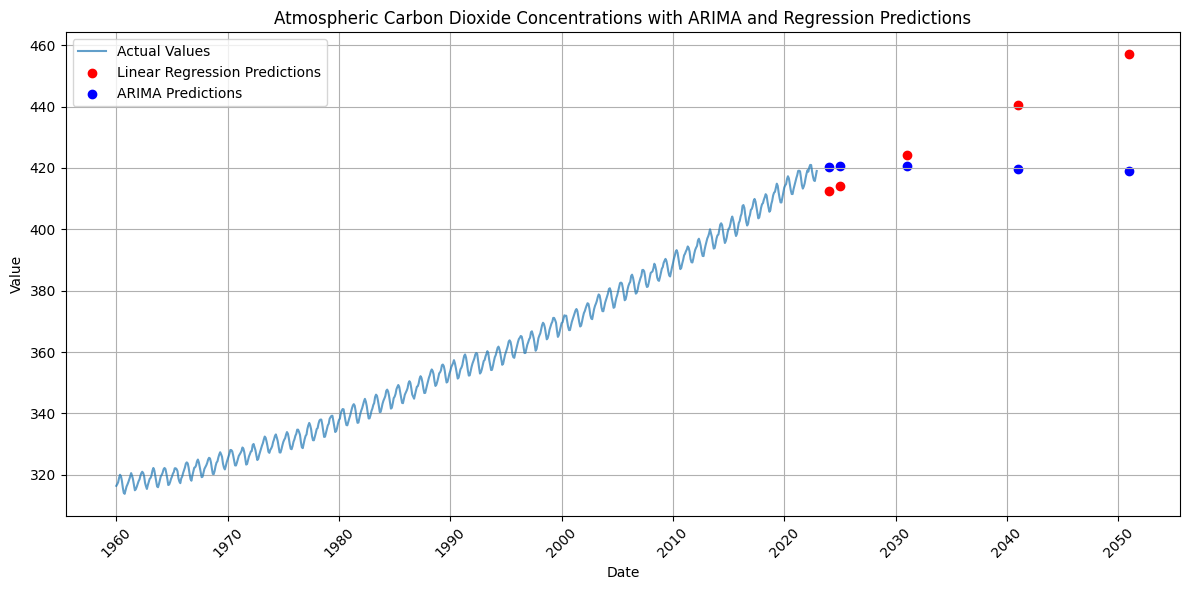

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

p = 2
d = 1
q = 1


# Fit the ARIMA model
model = ARIMA(df_filtered['Value'], order=(p, d, q))
model_fit = model.fit()


# Make predictions for future dates
future_predictions_arima = model_fit.predict(start=len(df_filtered), end=len(df_filtered) + len(future_dates) - 1)

# Create a DataFrame for future ARIMA predictions
future_df_arima = pd.DataFrame({'Date': future_dates, 'Value': future_predictions_arima})


print("Future Predictions using ARIMA:")
for date, prediction in zip(future_dates, future_predictions_arima):
    print(f"Date: {date}, Predicted Value: {prediction}")

# Plot the combined data with ARIMA predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value', data=df_filtered, label='Actual Values', alpha=0.7)
plt.scatter(future_df['Date'], future_df['Value'], color='red', label='Linear Regression Predictions')
plt.scatter(future_df_arima['Date'], future_df_arima['Value'], color='blue', label='ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Atmospheric Carbon Dioxide Concentrations with ARIMA and Regression Predictions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-22-cae99dfa131d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Value_scaled'] = scaler.fit_transform(df_filtered['Value'].values.reshape(-1, 1))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0578
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0045
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.7726e-04
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.0704e-04
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.5038e-04
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7625e-04
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6186e-04
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3815e-04
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8707e-04
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.4444e-04
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3039e-04
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.4004e-04
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.5039e-04
Epoch 15/50
19/19 ━━━━━━━━━━━━━

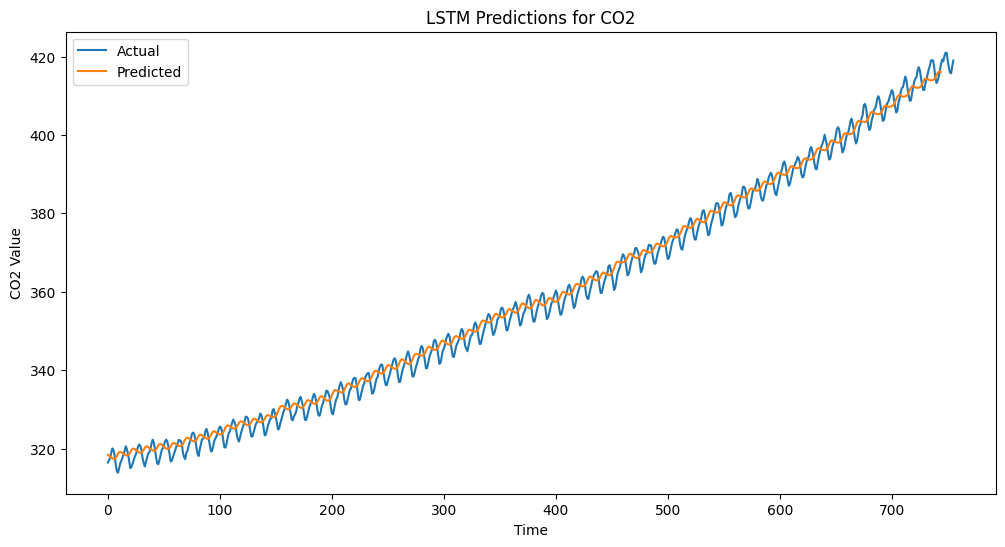

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the 'Value' column
scaler = MinMaxScaler()
df_filtered['Value_scaled'] = scaler.fit_transform(df_filtered['Value'].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  # Adjust this value as needed
X, y = create_dataset(df_filtered['Value_scaled'].values.reshape(-1, 1), look_back)

# Reshape X for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1) # Adjust epochs and batch_size

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df_filtered['Value_scaled'].values.reshape(-1,1)), label='Actual')
plt.plot(np.concatenate((train_predict, test_predict)), label='Predicted')
plt.xlabel('Time')
plt.ylabel('CO2 Value')
plt.title('LSTM Predictions for CO2')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


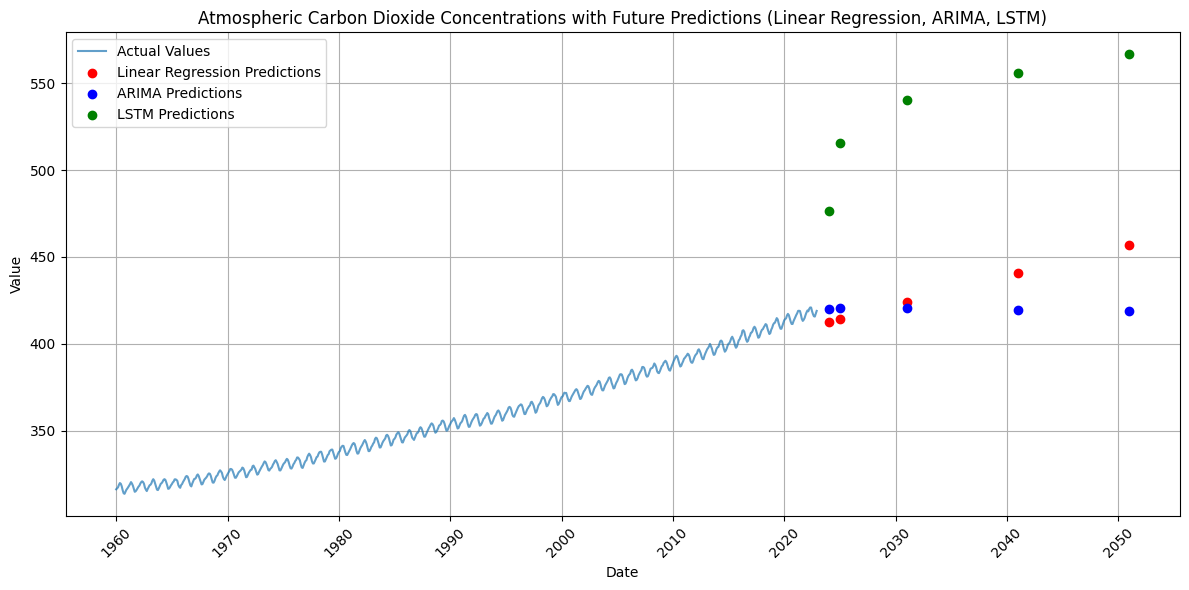

In [ ]:
future_dates = pd.to_datetime(['2023-12-31', '2024-12-31', '2030-12-31', '2040-12-31', '2050-12-31'])

future_time = (future_dates - df_filtered['Date'].min()).days
future_time_scaled = scaler.transform(future_time.values.reshape(-1, 1))

# Create sequences for future predictions
future_X = []
last_sequence = X[-1]

for i in range(len(future_dates)):
  last_sequence = np.append(last_sequence[1:],future_time_scaled[i])
  future_X.append(last_sequence)

future_X = np.array(future_X).reshape(len(future_dates), look_back, 1)


# Predict future values using LSTM
future_predictions_lstm = model.predict(future_X)

# Inverse transform to get actual values
future_predictions_lstm = scaler.inverse_transform(future_predictions_lstm)


# Create DataFrame for LSTM future predictions
future_df_lstm = pd.DataFrame({'Date': future_dates, 'Value': future_predictions_lstm.flatten()})


# Plot all predictions together
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value', data=df_filtered, label='Actual Values', alpha=0.7)
plt.scatter(future_df['Date'], future_df['Value'], color='red', label='Linear Regression Predictions')
plt.scatter(future_df_arima['Date'], future_df_arima['Value'], color='blue', label='ARIMA Predictions')
plt.scatter(future_df_lstm['Date'], future_df_lstm['Value'], color='green', label='LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Atmospheric Carbon Dioxide Concentrations with Future Predictions (Linear Regression, ARIMA, LSTM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Print the model summary LSTM
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)